## Data cleaning

In [1]:
#importation de biblioteques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading dataset

data = pd.read_csv("../dataset.csv", sep=';')


In [3]:
# preview
data.head()


,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,2019,920040503,Gresillons Iii,4,NaN,RUE,MARCEAU DELORME,92004,Asnières-sur-Seine,RESIDENTIEL,20,50.322,2.516,3.272,4 RUE MARCEAU DELORME,200054781.0,92.0,11.0,20009
1,2019,920040502,Gresillons Ii,2,NaN,RUE,MARIA MONTESSORI,92004,Asnières-sur-Seine,RESIDENTIEL,36,195.247,5.424,3.272,2 RUE MARIA MONTESSORI,200054781.0,92.0,11.0,20011
2,2019,920040401,Mairie i,56,NaN,RUE,MAURICE BOKANOWSKI,92004,Asnières-sur-Seine,RESIDENTIEL,13,24.689,1.899,3.272,56 RUE MAURICE BOKANOWSKI,200054781.0,92.0,11.0,20018
3,2019,920040401,Mairie i,38,NaN,RUE,MAURICE BOKANOWSKI,92004,Asnières-sur-Seine,RESIDENTIEL,13,26.807,2.062,3.272,38 RUE MAURICE BOKANOWSKI,200054781.0,92.0,11.0,20025
4,2019,920040403,Mairie Iii,5,NaN,RUE,MAURICE BOKANOWSKI,92004,Asnières-sur-Seine,RESIDENTIEL,11,24.715,2.247,3.272,5 RUE MAURICE BOKANOWSKI,200054781.0,92.0,11.0,20032


In [4]:
print(f"taille du dataframe{data.shape}")

taille du dataframe(20000, 19)


In [5]:
data.describe()

,Année,Numéro de voie,Code Commune,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1.999800e+04,19998.000000,19998.000000,20000.000000
mean,2018.87460,61.516250,59509.689850,22.126250,59.581981,2.809250,3.626504,2.123174e+08,59.401740,49.184618,148043.705950
std,0.33118,202.526027,29919.637972,22.171849,66.334152,1.742617,0.943382,1.993599e+07,29.921929,33.286574,113534.734031
min,2018.00000,1.000000,1014.000000,10.000000,0.351000,0.023000,1.665000,2.000002e+08,1.000000,11.000000,20009.000000
25%,2019.00000,6.000000,33063.000000,12.000000,25.118250,1.650000,2.985000,2.000548e+08,33.000000,11.000000,69158.250000
50%,2019.00000,17.000000,69123.000000,16.000000,40.301500,2.206000,3.415000,2.000580e+08,69.000000,44.000000,109317.500000
75%,2019.00000,46.000000,91122.000000,24.000000,68.855500,3.525250,3.970000,2.417004e+08,91.000000,84.000000,183117.000000
max,2019.00000,9004.000000,95428.000000,810.000000,1643.108000,28.784000,11.608000,2.495005e+08,95.000000,93.000000,428991.000000


In [6]:
# information basique du datasets comme type de donnee pour colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Année                                                          20000 non-null  int64  
 1   Code IRIS                                                      20000 non-null  object 
 2   Nom IRIS                                                       20000 non-null  object 
 3   Numéro de voie                                                 20000 non-null  int64  
 4   Indice de répétition                                           1060 non-null   object 
 5   Type de voie                                                   19930 non-null  object 
 6   Libellé de voie                                                20000 non-null  object 
 7   Code Commune                                              

In [7]:
# porcentage de valeur null pour columne

percent_null= data.isnull().sum()*100 / len(data)
percent_null.sort_values(ascending=False,inplace=True)

percent_null.head(10)

Indice de répétition                                             94.70
Type de voie                                                      0.35
Code Région                                                       0.01
Code Département                                                  0.01
Code EPCI                                                         0.01
Année                                                             0.00
Consommation annuelle totale de l'adresse (MWh)                   0.00
Adresse                                                           0.00
Consommation annuelle moyenne de la commune (MWh)                 0.00
Consommation annuelle moyenne par logement de l'adresse (MWh)     0.00
dtype: float64

Text(0.5, 1.0, 'Répartition du pourcentage de valeurs manquantessupérieures au seuil de {threshold_view}%')

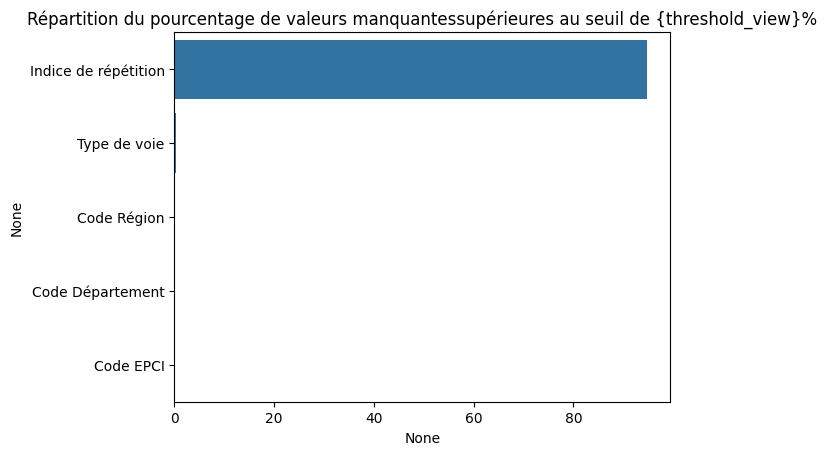

In [8]:
# visualisation de porcentage en forme ascendete

threshold_view = 0.0

filtered = percent_null[percent_null.values > threshold_view]
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes"
             "supérieures au seuil de {threshold_view}%")


In [9]:
# la colonne indice de repetion as beacoup de vaeur manqueant
data['Indice de répétition'].value_counts()

Indice de répétition
B    697
A    134
T    117
C     40
D     33
F     12
E     10
G      6
Q      4
H      3
L      2
J      1
K      1
Name: count, dtype: int64

il y a plus de 19000 valeurs null dans cette colonne

In [10]:
# supprimer la colonne indice de repetition parce il y a plus 94 % de valeur manquat
data.drop('Indice de répétition', axis= 1, inplace= True)

In [11]:
data['Type de voie'].value_counts()

Type de voie
RUE                            11722
AVENUE                          3183
BOULEVARD                       1155
ALLEE                           1009
PLACE                            546
CHEMIN                           526
ROUTE                            367
SQUARE                           274
IMPASSE                          239
QUAI                             153
CRS                              125
RESIDENCE                         81
TRAVERSE                          47
PASSAGE                           46
CLOS                              39
GRANDE RUE                        38
QUARTIER                          36
MAIL                              32
CITE                              32
VILLA                             28
MONTEE                            27
ESPLANADE                         26
PROMENADE                         24
PARC                              19
SENTIER                           19
DOMAINE                           16
VOIE                     

Supprimer les valeurs nulles du DataFrame

In [12]:
# supprimir valeur null du data frame
data.dropna(inplace=True)

In [13]:
# verification de valeur nul
valeur_nul= data.isnull().sum()
valeur_nul.head(19)

Année                                                            0
Code IRIS                                                        0
Nom IRIS                                                         0
Numéro de voie                                                   0
Type de voie                                                     0
Libellé de voie                                                  0
Code Commune                                                     0
Nom Commune                                                      0
Segment de client                                                0
Nombre de logements                                              0
Consommation annuelle totale de l'adresse (MWh)                  0
Consommation annuelle moyenne par logement de l'adresse (MWh)    0
Consommation annuelle moyenne de la commune (MWh)                0
Adresse                                                          0
Code EPCI                                                     

Tranformation de type de donnees

In [14]:
# type de valeurs float a int
data[['Code EPCI', 'Code Département', 'Code Région','Année']]=data[['Code EPCI', 'Code Département', 'Code Région', 'Année']].astype(int)

## Encodage des etiquettes

In [15]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [16]:
data_categ=data.select_dtypes(exclude=[np.number])
data_addres= data_categ[['Adresse','Libellé de voie']]
data_categ=data_categ.drop(columns=['Adresse','Libellé de voie'])

In [17]:
one_hot = OneHotEncoder()
one_hot.fit(data_categ)

OneHotEncoder()

In [18]:
encoded_features = one_hot.transform(data_categ).toarray()
encoded_features

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
encoded_features_names = one_hot.get_feature_names_out()
encoded_features_names

array(['Code IRIS_010140000', 'Code IRIS_010240000',
       'Code IRIS_010270000', ..., 'Nom Commune_Nailloux',
       'Nom Commune_Nancy', 'Segment de client_RESIDENTIEL'], dtype=object)

In [20]:
data_one_hot= pd.DataFrame(encoded_features,
            columns = encoded_features_names)

In [21]:
data_one_hot.head()

,Code IRIS_010140000,Code IRIS_010240000,Code IRIS_010270000,Code IRIS_010320000,Code IRIS_010430000,Code IRIS_010470000,Code IRIS_010530101,Code IRIS_010530102,Code IRIS_010530103,Code IRIS_010530201,...,Nom Commune_Méry,Nom Commune_Méry-sur-Oise,Nom Commune_Méré,Nom Commune_Mézidon Vallée d'Auge,Nom Commune_Mézy-sur-Seine,Nom Commune_Mézériat,Nom Commune_Mûrs-Erigné,Nom Commune_Nailloux,Nom Commune_Nancy,Segment de client_RESIDENTIEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
def plot_all_numerique(df):
    # Filtre les columns numeriques
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()


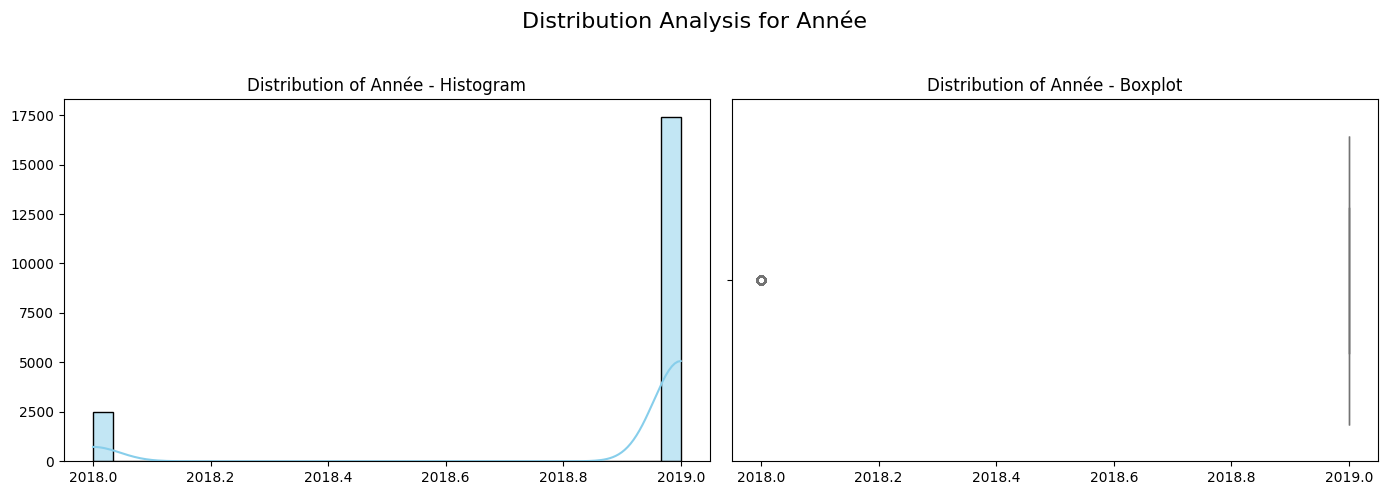

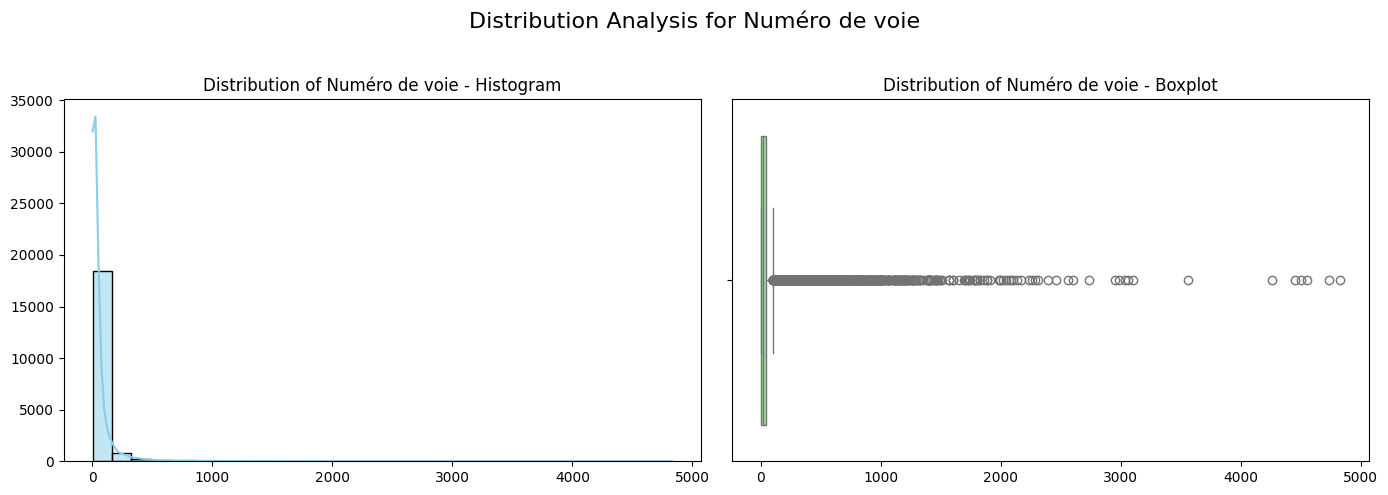

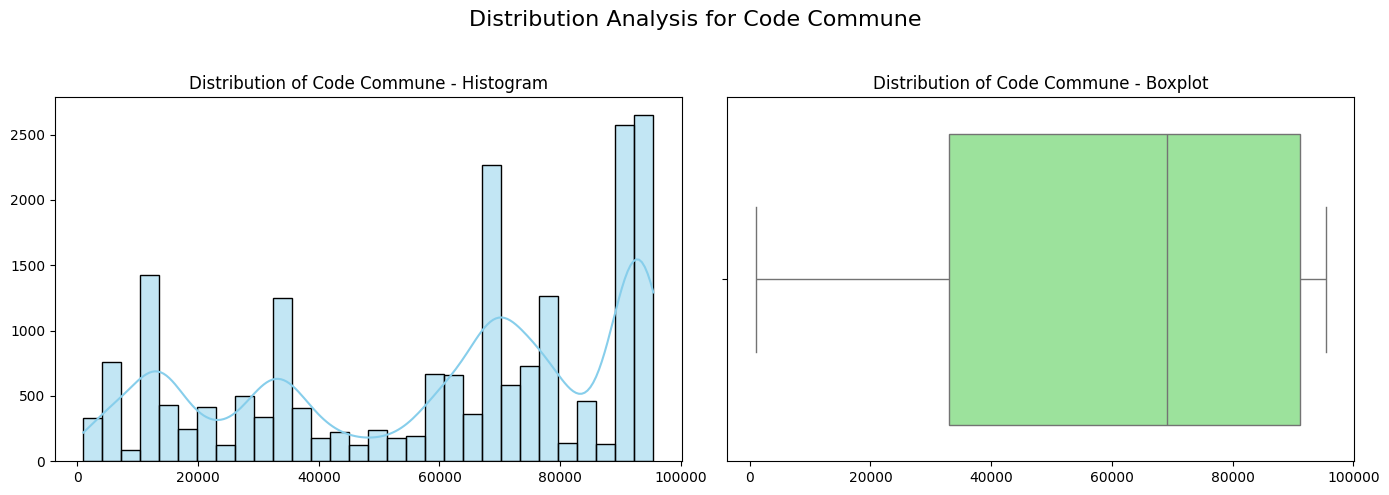

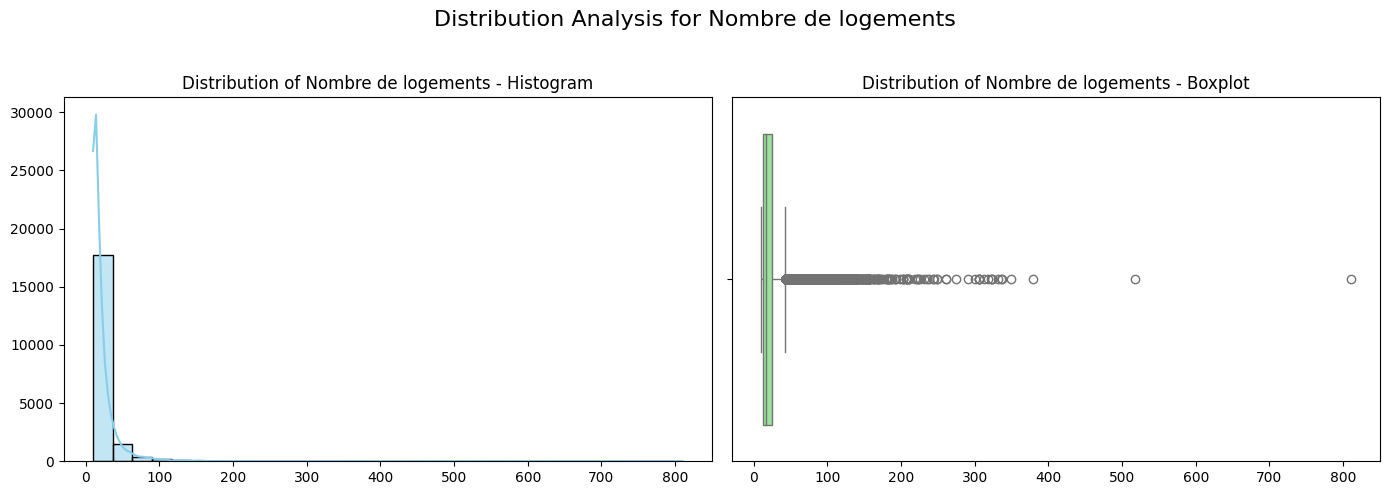

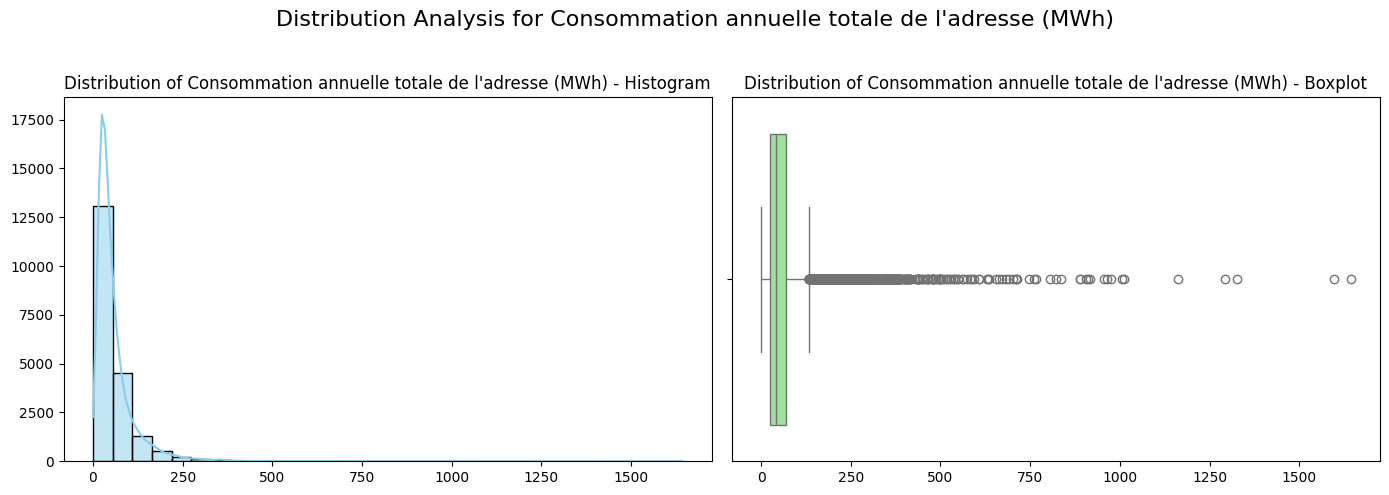

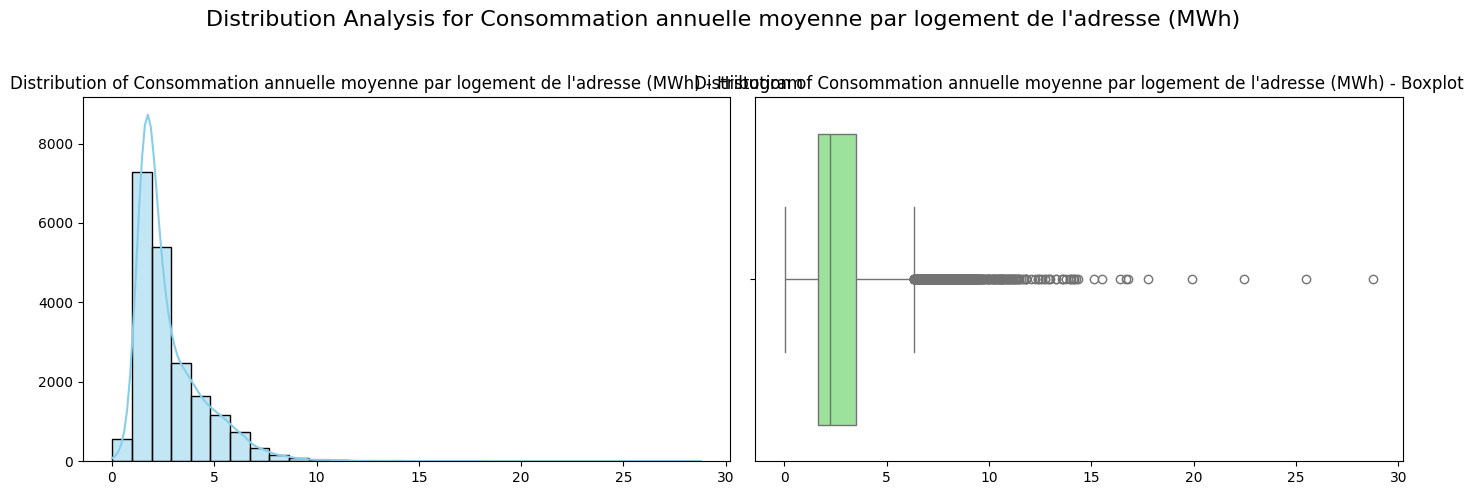

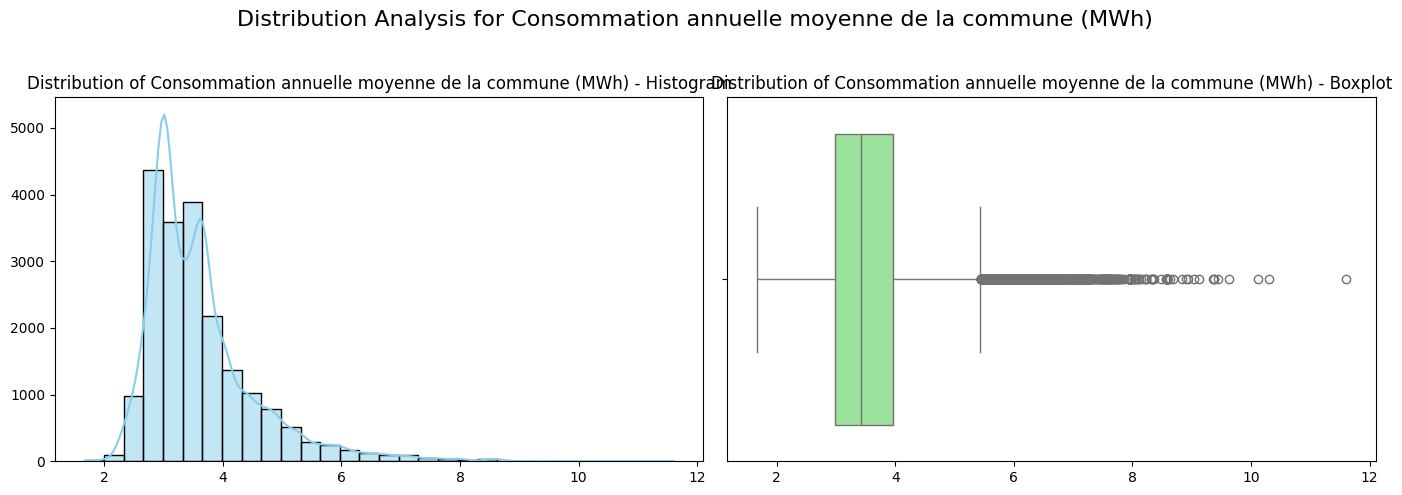

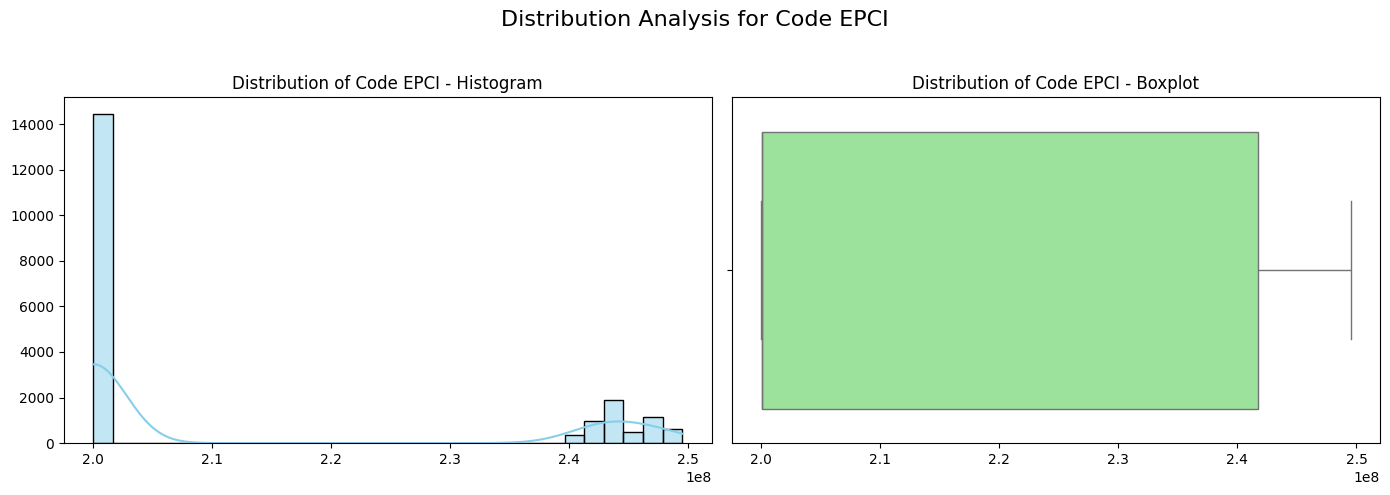

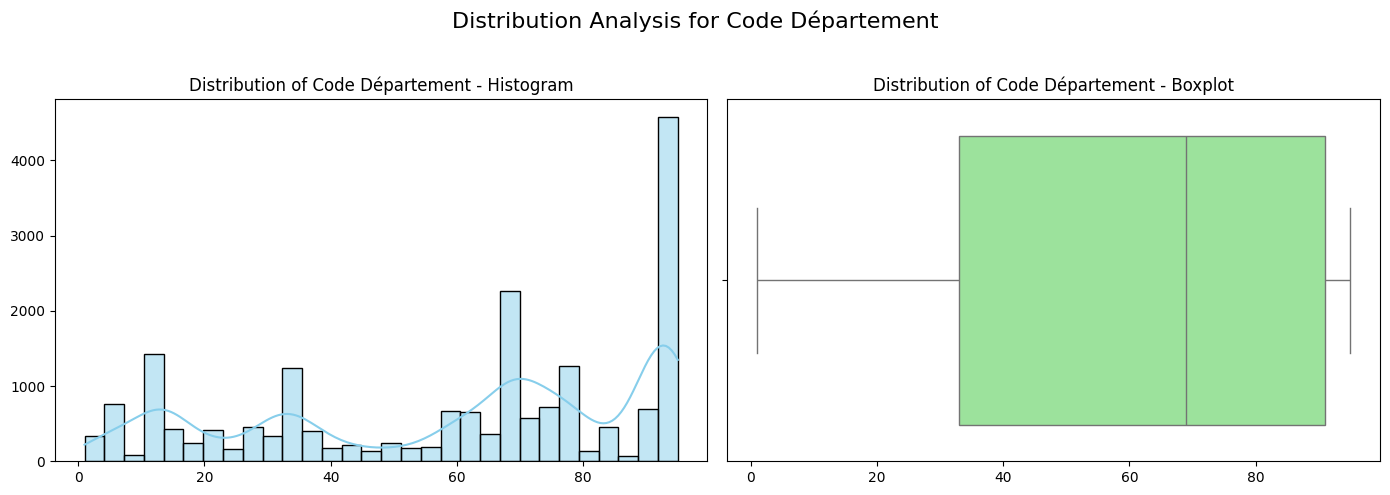

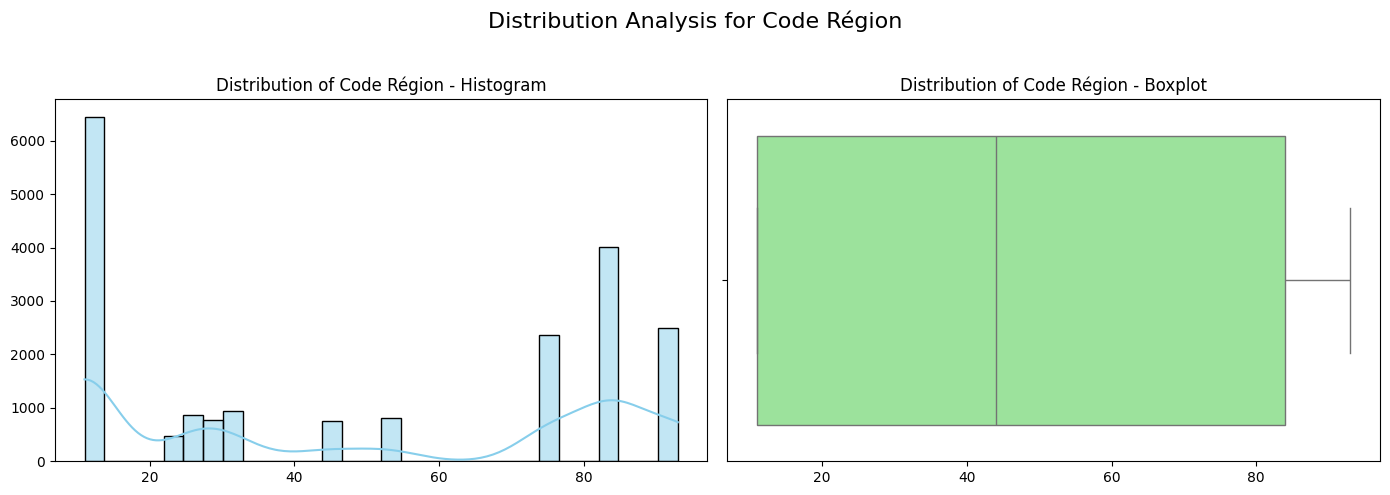

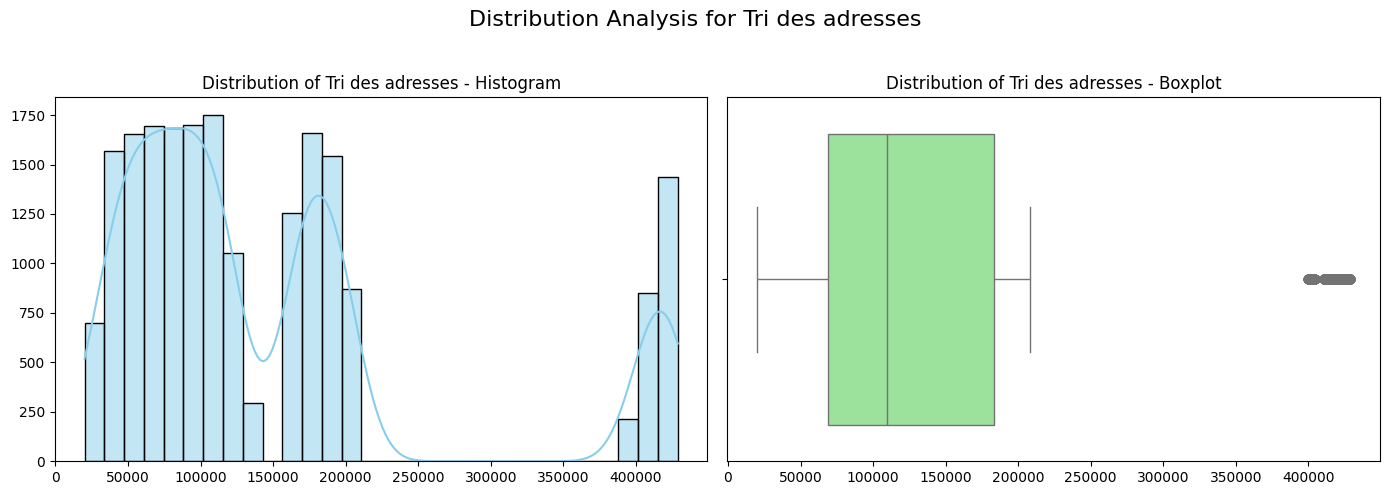

In [23]:
plot_all_numerique(data)

## Selection des colonnees numeriques pour encodage

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [25]:
# separation de un dataframe numerique
data_numerique=data.select_dtypes(include=[np.number])
data_numerique.columns

Index(['Année', 'Numéro de voie', 'Code Commune', 'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Code EPCI',
       'Code Département', 'Code Région', 'Tri des adresses'],
      dtype='object')

In [26]:
# list des colonnes pour aplique methode robustscaler
list_robustscaler=['Année', 'Numéro de voie', 'Code Commune', 'Nombre de logements',"Consommation annuelle totale de l'adresse (MWh)",
       "Consommation annuelle moyenne par logement de l'adresse (MWh)",
       "Consommation annuelle moyenne de la commune (MWh)", "Code EPCI",
       "Code Département", "Code Région", "Tri des adresses"]

In [27]:
# application de methode robustscaler

rbscaler = RobustScaler()
for col in list_robustscaler:
    rbscaler_data = rbscaler.fit_transform(data_numerique.loc[:,[col]])

In [28]:
#Concatenation de data
data_transforme= pd.concat([data_one_hot, data_numerique, data_addres], axis=1)

In [29]:
data_transforme.head()

,Code IRIS_010140000,Code IRIS_010240000,Code IRIS_010270000,Code IRIS_010320000,Code IRIS_010430000,Code IRIS_010470000,Code IRIS_010530101,Code IRIS_010530102,Code IRIS_010530103,Code IRIS_010530201,...,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code EPCI,Code Département,Code Région,Tri des adresses,Adresse,Libellé de voie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,50.322,2.516,3.272,200054781.0,92.0,11.0,20009.0,4 RUE MARCEAU DELORME,MARCEAU DELORME
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,195.247,5.424,3.272,200054781.0,92.0,11.0,20011.0,2 RUE MARIA MONTESSORI,MARIA MONTESSORI
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,24.689,1.899,3.272,200054781.0,92.0,11.0,20018.0,56 RUE MAURICE BOKANOWSKI,MAURICE BOKANOWSKI
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,26.807,2.062,3.272,200054781.0,92.0,11.0,20025.0,38 RUE MAURICE BOKANOWSKI,MAURICE BOKANOWSKI
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,24.715,2.247,3.272,200054781.0,92.0,11.0,20032.0,5 RUE MAURICE BOKANOWSKI,MAURICE BOKANOWSKI


In [30]:
# exportation de dataframe
# data_transforme.to_csv('clean_data.csv')

In [ ]:
# jules est con